# Data Understanding

In [1]:
!pip install pandas seaborn


  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp311-cp311-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.0 MB 2.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 2.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.0 MB 2.7 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.0 MB 2.7 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.0 MB 2.7 MB/s eta 0:00:02
   ------------------- -------------------- 3

In [5]:
import pandas as pd
import seaborn as sns

DATA_PATH = "data/"

info_tourism = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
tourism_rating = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
users = pd.read_csv(f"{DATA_PATH}/user.csv")

In [6]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate
6,7,Tirto Ageng,Wisata air alami dengan kolam renang tradision...,Alam,Probolinggo,5000,4,1 jam,"-7.9442,113.3358"
23,24,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Danau,Probolinggo,5000,5,4 jam,"-7.9738,113.5703"
12,13,Museum DR. Mohammad Saleh,Museum yang menampilkan koleksi sejarah dan bu...,Sejarah,Probolinggo,5000,4,15 menit,"-7.7561,113.2176"
11,12,Sungai Pekalen,Tempat arung jeram terkenal dengan jeram-jeram...,Petualangan,Probolinggo,300000,5,1.5 jam,"-7.9110,113.3385"
5,6,Air Terjun Umbulan,"Air terjun alami yang terletak di pegunungan, ...",Air Terjun,Probolinggo,10000,4,1.5 jam,"-7.9338,113.2883"


In [7]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
54,175,1,2.5
14,135,1,3.0
1159,146,15,4.7
594,148,8,0.0
221,180,3,3.2


In [8]:
users.sample(5)

,User_Id,Location,Age
110,111,Pasuruan,36
103,104,Malang,31
53,54,Probolinggo,33
117,118,Surabaya,24
72,73,Pasuruan,29


In [9]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 24
Number of users : 201
The number of ratings given by the user to the dataset : 2025


# Exploratory Data Analysis

In [10]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Place_Id      24 non-null     int64 
 1   Place_Name    24 non-null     object
 2   Description   24 non-null     object
 3   Category      24 non-null     object
 4   City          24 non-null     object
 5   Price         24 non-null     int64 
 6   Rating        24 non-null     int64 
 7   Time_Minutes  24 non-null     object
 8   Coordinate    24 non-null     object
dtypes: int64(3), object(6)
memory usage: 1.8+ KB


In [11]:
info_tourism.isnull().sum()

Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Coordinate      0
dtype: int64

In [12]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        2025 non-null   int64  
 1   Place_Id       2025 non-null   int64  
 2   Place_Ratings  2025 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 47.6 KB


In [13]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   201 non-null    int64 
 1   Location  201 non-null    object
 2   Age       201 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [15]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [16]:
info_tourism.Category.unique()

array(['Alam', 'Pantai', 'Gunung', 'Danau', 'Air Terjun', 'Sejarah',
       'Kota', 'Taman', 'Petualangan', 'Budaya'], dtype=object)

# Data Preprocessing

In [18]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 25


In [19]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,1,3.7
1,2,1,4.0
2,3,1,3.7
3,4,1,4.3
4,5,1,4.1
...,...,...,...
2020,197,25,4.2
2021,198,25,5.0
2022,199,25,5.0
2023,200,25,5.0


In [20]:
all_tourism = pd.merge(all_tourism_rate, info_tourism[["Place_Id","Place_Name","Description","City","Category"]], on='Place_Id', how='inner')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,1,3.7,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam
1,2,1,4.0,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam
2,3,1,3.7,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam
3,4,1,4.3,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam
4,5,1,4.1,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam
...,...,...,...,...,...,...,...
1939,197,24,4.0,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau
1940,198,24,5.0,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau
1941,199,24,4.8,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau
1942,200,24,5.0,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau


In [21]:
all_tourism['Description_category'] = all_tourism[['Category','Description']].agg(' '.join,axis=1)

In [22]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Description_category
0,1,1,3.7,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam,Alam Air terjun dengan pemandangan spektakuler...
1,2,1,4.0,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam,Alam Air terjun dengan pemandangan spektakuler...
2,3,1,3.7,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam,Alam Air terjun dengan pemandangan spektakuler...
3,4,1,4.3,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam,Alam Air terjun dengan pemandangan spektakuler...
4,5,1,4.1,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam,Alam Air terjun dengan pemandangan spektakuler...
...,...,...,...,...,...,...,...,...
1939,197,24,4.0,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau,"Danau Danau alami di kawasan Gunung Argopuro, ..."
1940,198,24,5.0,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau,"Danau Danau alami di kawasan Gunung Argopuro, ..."
1941,199,24,4.8,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau,"Danau Danau alami di kawasan Gunung Argopuro, ..."
1942,200,24,5.0,Danau Taman Hidup,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo,Danau,"Danau Danau alami di kawasan Gunung Argopuro, ..."


# Data Preparation

## Missing Values

In [23]:
all_tourism.isnull().sum()

User_Id                 0
Place_Id                0
Place_Ratings           0
Place_Name              0
Description             0
City                    0
Category                0
Description_category    0
dtype: int64

In [24]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Description_category
0,1,1,3.7,Air Terjun Madakaripura,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam,Alam Air terjun dengan pemandangan spektakuler...
81,6,2,4.0,Pantai Duta,"Pantai dengan pasir putih, area konservasi man...",Probolinggo,Pantai,"Pantai Pantai dengan pasir putih, area konserv..."
162,11,3,3.7,Gunung Argapura,"Gunung dengan trek pendakian panjang, memiliki...",Probolinggo,Gunung,"Gunung Gunung dengan trek pendakian panjang, m..."
243,16,4,4.0,Danau Desa Ranu Agung,Danau alami di tengah desa dengan suasana tena...,Probolinggo,Danau,Danau Danau alami di tengah desa dengan suasan...
324,21,5,3.7,Pantai Bentar,Pantai dengan dermaga panjang dan tempat obser...,Probolinggo,Pantai,Pantai Pantai dengan dermaga panjang dan tempa...
405,26,6,4.3,Air Terjun Umbulan,"Air terjun alami yang terletak di pegunungan, ...",Probolinggo,Air Terjun,Air Terjun Air terjun alami yang terletak di p...
486,36,7,3.8,Tirto Ageng,Wisata air alami dengan kolam renang tradision...,Probolinggo,Alam,Alam Wisata air alami dengan kolam renang trad...
567,41,8,4.3,Candi Jabung,Candi peninggalan Majapahit dengan arsitektur ...,Probolinggo,Sejarah,Sejarah Candi peninggalan Majapahit dengan ars...
648,46,9,4.0,Gembok Cinta BJBR,Spot romantis di kawasan wisata BJBR Proboling...,Probolinggo,Kota,Kota Spot romantis di kawasan wisata BJBR Prob...
729,51,10,4.7,Taman Wisata Study Lingkungan,Taman edukasi lingkungan dengan berbagai aktiv...,Probolinggo,Taman,Taman Taman edukasi lingkungan dengan berbagai...


In [26]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

Description_category = preparation.Description_category.tolist()

In [27]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "Description_category":Description_category
})

tourism_new

,id,name,category,description,city,Description_category
0,1,Air Terjun Madakaripura,Alam,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam Air terjun dengan pemandangan spektakuler...
1,2,Pantai Duta,Pantai,"Pantai dengan pasir putih, area konservasi man...",Probolinggo,"Pantai Pantai dengan pasir putih, area konserv..."
2,3,Gunung Argapura,Gunung,"Gunung dengan trek pendakian panjang, memiliki...",Probolinggo,"Gunung Gunung dengan trek pendakian panjang, m..."
3,4,Danau Desa Ranu Agung,Danau,Danau alami di tengah desa dengan suasana tena...,Probolinggo,Danau Danau alami di tengah desa dengan suasan...
4,5,Pantai Bentar,Pantai,Pantai dengan dermaga panjang dan tempat obser...,Probolinggo,Pantai Pantai dengan dermaga panjang dan tempa...
5,6,Air Terjun Umbulan,Air Terjun,"Air terjun alami yang terletak di pegunungan, ...",Probolinggo,Air Terjun Air terjun alami yang terletak di p...
6,7,Tirto Ageng,Alam,Wisata air alami dengan kolam renang tradision...,Probolinggo,Alam Wisata air alami dengan kolam renang trad...
7,8,Candi Jabung,Sejarah,Candi peninggalan Majapahit dengan arsitektur ...,Probolinggo,Sejarah Candi peninggalan Majapahit dengan ars...
8,9,Gembok Cinta BJBR,Kota,Spot romantis di kawasan wisata BJBR Proboling...,Probolinggo,Kota Spot romantis di kawasan wisata BJBR Prob...
9,10,Taman Wisata Study Lingkungan,Taman,Taman edukasi lingkungan dengan berbagai aktiv...,Probolinggo,Taman Taman edukasi lingkungan dengan berbagai...


   Place_Id  rating_count               Place_Name
0         1             1  Air Terjun Madakaripura
1         2             1              Pantai Duta
2         3             1          Gunung Argapura
3         4             1    Danau Desa Ranu Agung
4         5             1            Pantai Bentar


C:\Users\arysw\AppData\Local\Temp\ipykernel_15964\2457496877.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='Place_Name', data=top_10, palette='viridis')


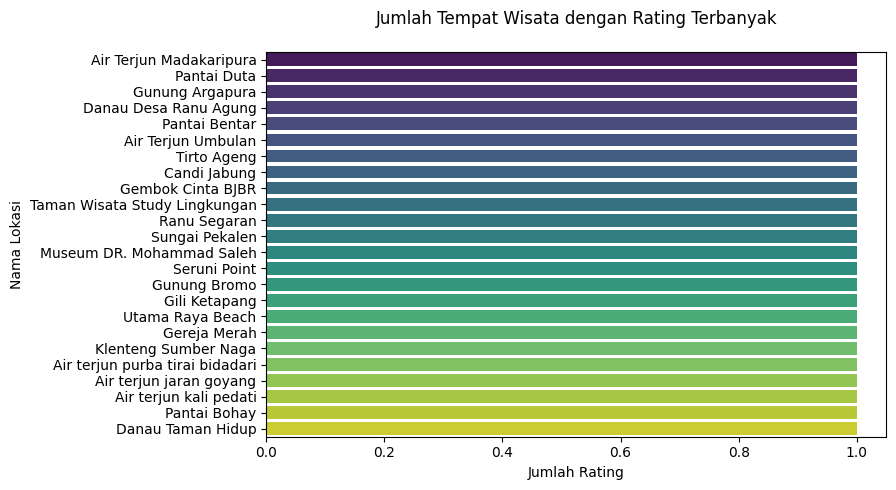

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Menghitung jumlah tempat wisata dengan rating terbanyak
top_10 = tourism_new['id'].value_counts().reset_index()
top_10.columns = ['Place_Id', 'rating_count']

# Menggabungkan dengan data preparation berdasarkan Place_Id
top_10 = pd.merge(top_10, preparation[['Place_Id', 'Place_Name']], how='left', on='Place_Id')

# Periksa hasil penggabungan
print(top_10.head())

# Membuat visualisasi wisata dengan jumlah rating terbanyak
if top_10.empty:
    print("Data kosong setelah penggabungan. Periksa data input.")
else:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='rating_count', y='Place_Name', data=top_10, palette='viridis')
    plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
    plt.xlabel('Jumlah Rating')
    plt.ylabel('Nama Lokasi')
    plt.show()


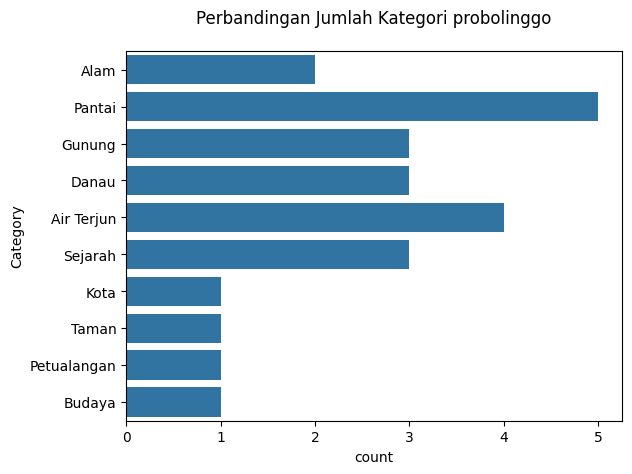

In [30]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori probolinggo', pad=20)
plt.show()

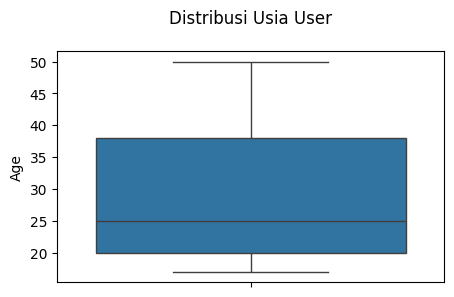

In [31]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

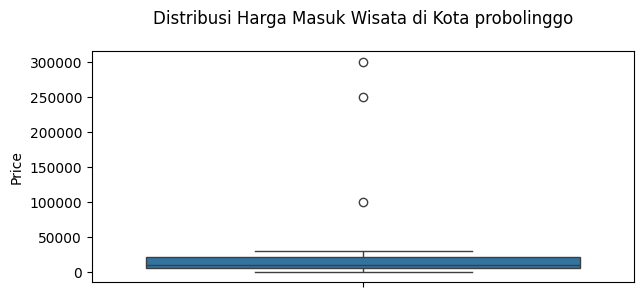

In [32]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota probolinggo', pad=20)
plt.show()

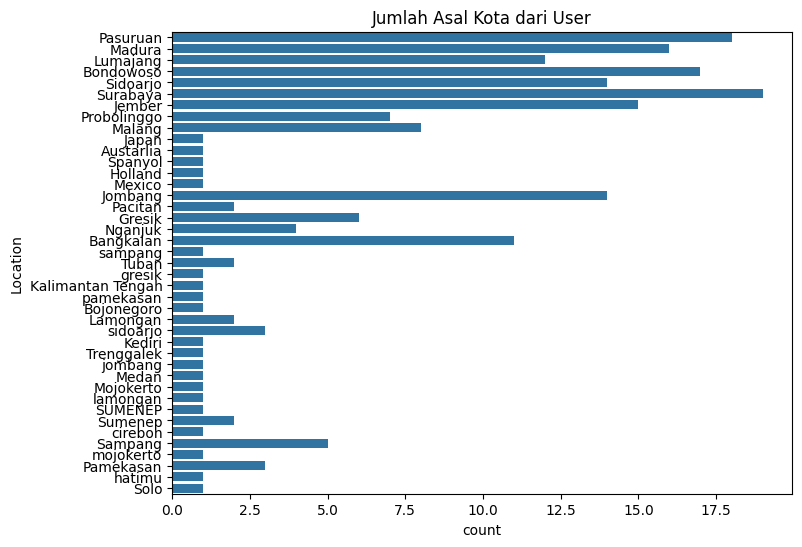

In [35]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

#### 

# Content Based Filtering

In [36]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,Description_category
0,1,Air Terjun Madakaripura,Alam,Air terjun dengan pemandangan spektakuler di k...,Probolinggo,Alam Air terjun dengan pemandangan spektakuler...
16,17,Utama Raya Beach,Pantai,Pantai dengan fasilitas modern seperti restora...,Probolinggo,Pantai Pantai dengan fasilitas modern seperti ...
21,22,Air terjun kali pedati,Air Terjun,"Air terjun tersembunyi di tengah hutan, menawa...",Probolinggo,Air Terjun Air terjun tersembunyi di tengah hu...
6,7,Tirto Ageng,Alam,Wisata air alami dengan kolam renang tradision...,Probolinggo,Alam Wisata air alami dengan kolam renang trad...
20,21,Air terjun jaran goyang,Air Terjun,Air terjun kecil dengan mitos lokal tentang ku...,Probolinggo,Air Terjun Air terjun kecil dengan mitos lokal...


## TF-IDF Vectorizer

In [40]:
# Install scikit-learn
%pip install scikit-learn

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Note: you may need to restart the kernel to use updated packages.
Features Name:  ['alam', 'pantai', 'gunung', 'danau', 'air', 'terjun', 'sejarah', 'kota', 'taman', 'petualangan', 'budaya']


In [41]:
cv_matrix = cv.transform(data['Description_category']) 
 
cv_matrix.shape 

(24, 11)

In [42]:
cv_matrix.todense()

matrix([[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0,

In [44]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,alam,pantai,gunung,danau,air,terjun,sejarah,kota,taman,petualangan,budaya
name,,,,,,,,,,,
Pantai Duta,0,0,0,0,0,0,2,0,0,0,0
Gembok Cinta BJBR,0,0,0,0,0,1,0,0,0,0,0
Gili Ketapang,0,0,0,0,0,0,1,0,0,0,0
Gunung Bromo,0,0,0,0,2,0,0,0,0,0,0
Pantai Bohay,0,0,0,0,0,0,2,0,0,0,0


## Cosine Similarity

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.5       , 0.        , 0.        ,
        0.70710678, 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.35355339, 0.        , 0.5       , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.70710678, 0.70710678, 0.        , 0.40824829],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.5       , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.40824829],
       [0.   

In [46]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Pantai Bohay,Gereja Merah,Air terjun kali pedati,Pantai Duta,Candi Jabung
name,,,,,
Gunung Argapura,0.0,0.000000,0.000000,0.0,0.000000
Air terjun kali pedati,0.0,0.000000,1.000000,0.0,0.000000
Air Terjun Madakaripura,0.0,0.000000,0.707107,0.0,0.000000
Museum DR. Mohammad Saleh,0.0,0.894427,0.000000,0.0,0.894427
Air terjun jaran goyang,0.0,0.000000,1.000000,0.0,0.000000
Pantai Duta,1.0,0.000000,0.000000,1.0,0.000000
Gunung Bromo,0.0,0.000000,0.000000,0.0,0.000000
Ranu Segaran,0.0,0.000000,0.000000,0.0,0.000000
Sungai Pekalen,0.0,0.000000,0.000000,0.0,0.000000


## Recommendation

In [48]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [49]:
tourism_recommendations("Air Terjun Madakaripura")

,name,category,description,city
0,Air Terjun Umbulan,Air Terjun,"Air terjun alami yang terletak di pegunungan, ...",Probolinggo
1,Tirto Ageng,Alam,Wisata air alami dengan kolam renang tradision...,Probolinggo
2,Air terjun jaran goyang,Air Terjun,Air terjun kecil dengan mitos lokal tentang ku...,Probolinggo
3,Air terjun purba tirai bidadari,Air Terjun,Air terjun eksotis dengan formasi bebatuan pur...,Probolinggo
4,Air terjun kali pedati,Air Terjun,"Air terjun tersembunyi di tengah hutan, menawa...",Probolinggo


In [50]:
tourism_recommendations("Taman Wisata Study Lingkungan")

,name,category,description,city
0,Danau Taman Hidup,Danau,"Danau alami di kawasan Gunung Argopuro, sering...",Probolinggo
1,Candi Jabung,Sejarah,Candi peninggalan Majapahit dengan arsitektur ...,Probolinggo
2,Ranu Segaran,Danau,Danau alami dengan pemandangan pegunungan dan ...,Probolinggo
3,Gembok Cinta BJBR,Kota,Spot romantis di kawasan wisata BJBR Proboling...,Probolinggo
4,Pantai Duta,Pantai,"Pantai dengan pasir putih, area konservasi man...",Probolinggo
